<font size="6">Data Preprocessing</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [2]:
df 

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


<font size="6">Null Value Elimination</font>

In [3]:
df.isnull().values.any()

True

In [4]:
df = df.apply (pd.to_numeric, errors='coerce')
df = df.dropna()

print (df)

          Timestamp      Open      High       Low     Close  Volume_(BTC)  \
0        1325317920      4.39      4.39      4.39      4.39      0.455581   
478      1325346600      4.39      4.39      4.39      4.39     48.000000   
547      1325350740      4.50      4.57      4.50      4.57     37.862297   
548      1325350800      4.58      4.58      4.58      4.58      9.000000   
1224     1325391360      4.58      4.58      4.58      4.58      1.502000   
...             ...       ...       ...       ...       ...           ...   
4857372  1617148560  58714.31  58714.31  58686.00  58686.00      1.384487   
4857373  1617148620  58683.97  58693.43  58683.97  58685.81      7.294848   
4857374  1617148680  58693.43  58723.84  58693.43  58723.84      1.705682   
4857375  1617148740  58742.18  58770.38  58742.18  58760.59      0.720415   
4857376  1617148800  58767.75  58778.18  58755.97  58778.18      2.712831   

         Volume_(Currency)  Weighted_Price  
0                 2.000000    

In [5]:
df.isnull().values.any()

False

<font size="6">Checking For Duplicates</font>

In [6]:
  df = df.drop_duplicates()
print('Result DataFrame:\n', df)

Result DataFrame:
           Timestamp      Open      High       Low     Close  Volume_(BTC)  \
0        1325317920      4.39      4.39      4.39      4.39      0.455581   
478      1325346600      4.39      4.39      4.39      4.39     48.000000   
547      1325350740      4.50      4.57      4.50      4.57     37.862297   
548      1325350800      4.58      4.58      4.58      4.58      9.000000   
1224     1325391360      4.58      4.58      4.58      4.58      1.502000   
...             ...       ...       ...       ...       ...           ...   
4857372  1617148560  58714.31  58714.31  58686.00  58686.00      1.384487   
4857373  1617148620  58683.97  58693.43  58683.97  58685.81      7.294848   
4857374  1617148680  58693.43  58723.84  58693.43  58723.84      1.705682   
4857375  1617148740  58742.18  58770.38  58742.18  58760.59      0.720415   
4857376  1617148800  58767.75  58778.18  58755.97  58778.18      2.712831   

         Volume_(Currency)  Weighted_Price  
0          

<font size="6">Linear Regression</font>

In [7]:
import pandas as pd
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [8]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df.isnull().values.any()
df.tail(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857367,1617148260,58677.05,58699.90,58660.00,58699.90,2.672676,156832.692130,58680.021260
4857368,1617148320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4857369,1617148380,58718.68,58731.23,58698.34,58698.50,0.207983,12209.055282,58702.294657
4857370,1617148440,58736.19,58762.43,58736.19,58739.95,0.041559,2441.376572,58745.145351
4857371,1617148500,58742.18,58742.18,58714.31,58714.31,2.519999,148004.448110,58731.946927
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,1617148800,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


In [9]:
df['Date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('Date')
Daily_Price = group['Weighted_Price'].mean()
Daily_Price.head()

Date
2011-12-31    4.471603
2012-01-01    4.806667
2012-01-02    5.000000
2012-01-03    5.252500
2012-01-04    5.208159
Name: Weighted_Price, dtype: float64

In [10]:
new_df= pd.DataFrame(list(Daily_Price), index = Daily_Price.index, columns = ["Close"])

In [11]:
new_df.head()

,Close
Date,
2011-12-31,4.471603
2012-01-01,4.806667
2012-01-02,5.000000
2012-01-03,5.252500
2012-01-04,5.208159


Text(0, 0.5, '$(Dollar)')

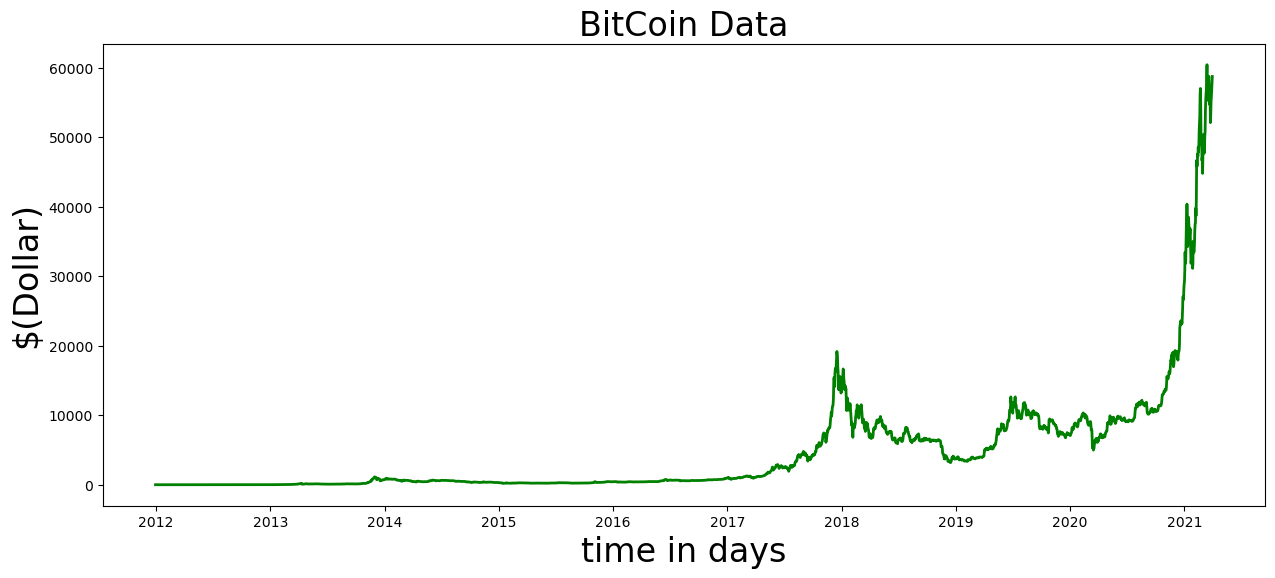

In [12]:
plt.plot(new_df,color='green', lw=2)
plt.title("BitCoin Data",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)

# Confidence ,MAE and R2

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df=new_df
forecast_out = int(20)

df['Prediction'] = df[['Close']].shift(-forecast_out)

X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(df['Prediction'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

clf = LinearRegression()
clf.fit(X_train,y_train)

cross_validation = clf.predict(X_test)

confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)
y_pred = clf.predict(X)
mae = (mean_absolute_error(y, y_pred))/100
print("mae:",mae)
r2 = r2_score(y, y_pred)
print("r2:",r2)

confidence:  0.9623371267846078
[63721.19928577 65943.87950984 67803.47154955 64487.39423184
 62048.8753924  62969.21273008 65572.14602884 65360.04051023
 65918.1975408  64267.90245507 63676.86853325 61333.02424782
 61806.12811548 58429.08650029 59688.1514409  61884.14908066
 62603.58221171 63819.54607865 65431.31356608 65900.8528743 ]
mae: 8.40637723889551
r2: 0.9508882426387346


C:\Users\dpran\AppData\Local\Temp\ipykernel_25604\2260799322.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'],1))


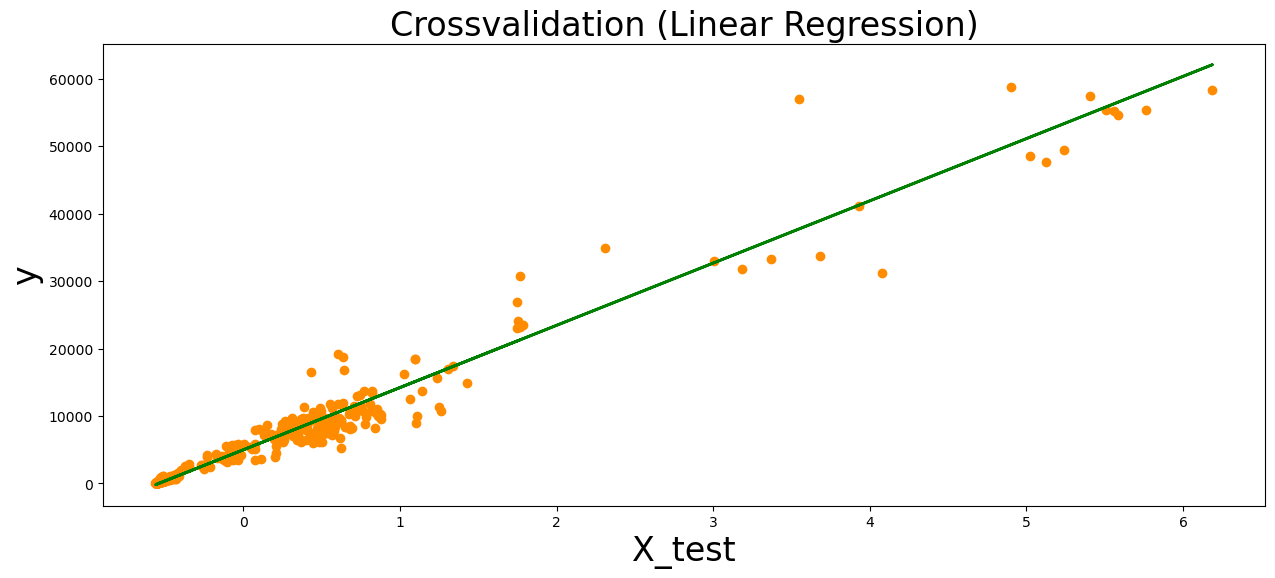

In [14]:
import matplotlib.pyplot as plt
# print(X_test)
# print(y_test)
# plt.plot(X_test,forecast_set,color='blue', linewidth=1)
plt.scatter(X_test, y_test, color='darkorange', label='test_data')
plt.plot(X_test, cross_validation, color='green', linewidth=2,label='predicted data')
# plt.plot(new_df,color='green', lw=2)
plt.title("Crossvalidation (Linear Regression)",fontsize=24)
plt.xlabel('X_test',fontsize=24)
plt.ylabel('y',fontsize=24)
# plt.plot(X_test, forecast_prediction, color='blue', linew/idth=2)
plt.show()


# RMSE

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms1 = (sqrt(mean_squared_error(y_test, cross_validation)))/10000
print(rms1)

0.16562467724223842


In [16]:
last_date = new_df.iloc[-1].name
print(last_date)

2021-03-31


In [17]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
date_today = last_date
days = pd.date_range(date_today, date_today + timedelta(19), freq='D')
print(len(days),len(forecast_prediction))
df1 = pd.DataFrame({'Date': days, 'Close': forecast_prediction})
df1 =df1.set_index('Date')
df1.info()
print(df.head())

20 20
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2021-03-31 to 2021-04-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes
               Close  Prediction
Date                            
2011-12-31  4.471603    6.835000
2012-01-01  4.806667    6.386000
2012-01-02  5.000000    6.485000
2012-01-03  5.252500    6.407500
2012-01-04  5.208159    6.495556


Text(0, 0.5, '$(Dollar)')

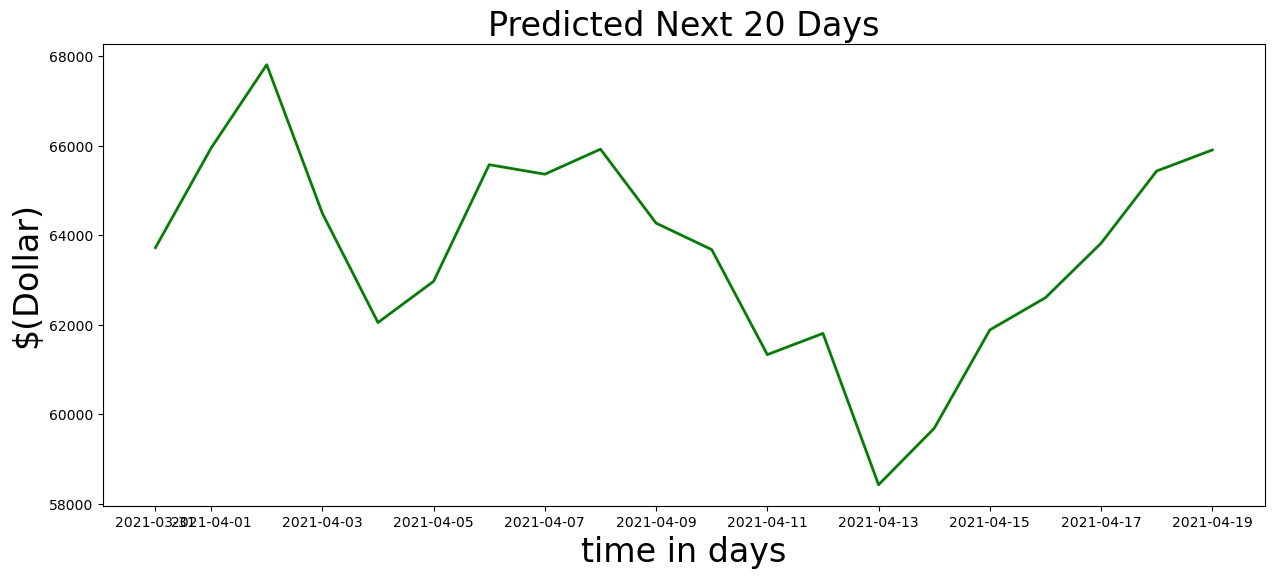

In [18]:
plt.plot(df1,color='green', lw=2)
plt.title("Predicted Next 20 Days",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)

Text(0, 0.5, '$(Dollar)')

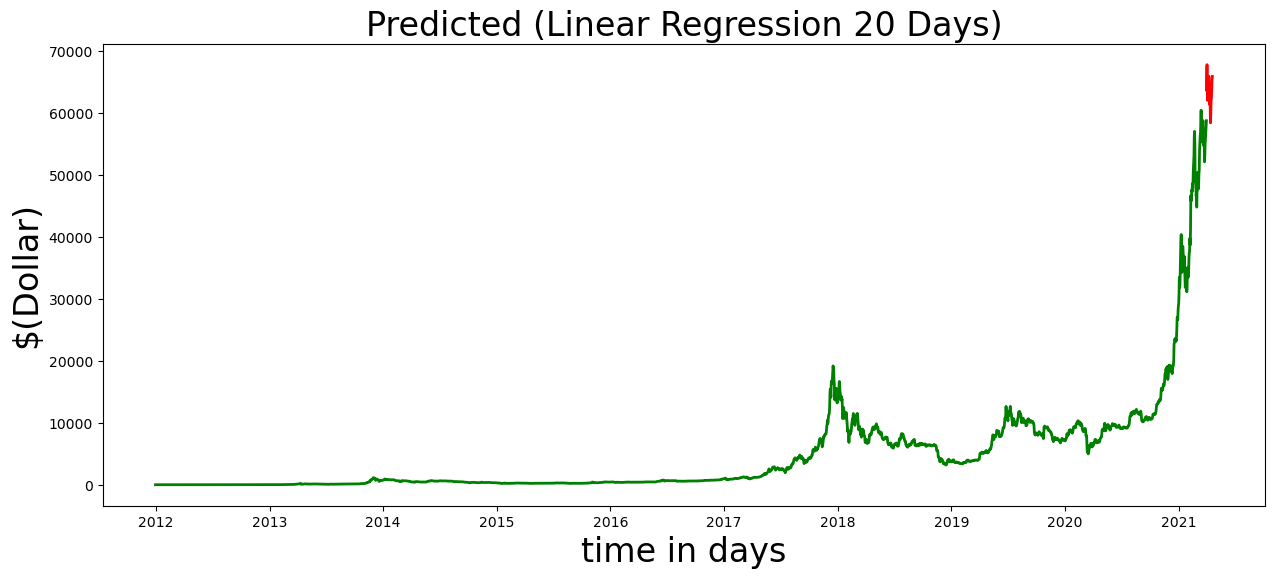

In [19]:
plt.plot(df1,)
plt.plot(df['Close'],color='green', lw=2, label='Bitcoin Data')
plt.plot(df1['Close'],color='red', lw=2, label='Predicted')
plt.title("Predicted (Linear Regression 20 Days)",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)



<font size="11">Random Forest Regressor</font>

In [20]:
new_df= pd.DataFrame(list(Daily_Price), index = Daily_Price.index, columns = ["Close"])


In [21]:
new_df.head()

,Close
Date,
2011-12-31,4.471603
2012-01-01,4.806667
2012-01-02,5.000000
2012-01-03,5.252500
2012-01-04,5.208159


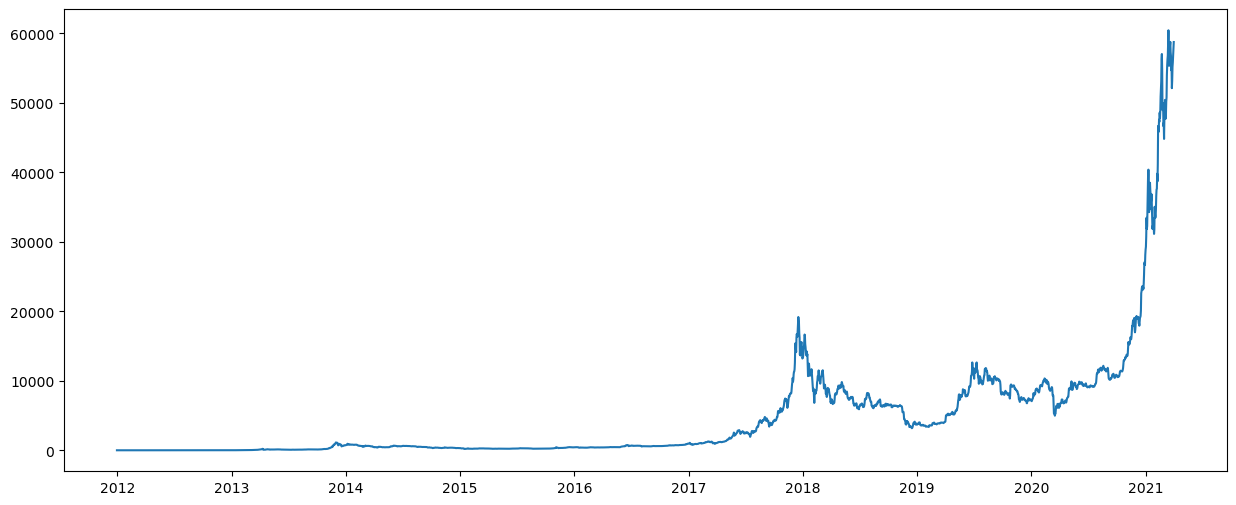

In [22]:
plt.plot(new_df)

# Confidence, MAE and R2

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# df = df[['Close']]
df=new_df
forecast_out = int(20)

df['Prediction'] = df[['Close']].shift(-forecast_out)

X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(df['Prediction'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

# clf = LinearRegression()
# clf.fit(X_train,y_train)
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
#            max_features='auto', max_leaf_nodes=None,
#            min_impurity_split=1e-07, min_samples_leaf=1,
#            min_samples_split=2, min_weight_fraction_leaf=0.0,
#            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
#            verbose=0, warm_start=False)


# y_pred = forest_reg.predict(X_test)
# forest_mse = mean_squared_error(y_pred, y_test)
# forest_rmse = np.sqrt(forest_mse)
# print('Random Forest RMSE: %.4f' % forest_rmse)

cross_validation = forest_reg.predict(X_test)

confidence2 = forest_reg.score(X_test, y_test)
print("confidence: ", confidence2)

forecast_prediction = forest_reg.predict(X_forecast)
print(forecast_prediction)

y_pred = forest_reg.predict(X)
mae2 = (mean_absolute_error(y, y_pred))/100
print("Mae",mae2)
r22 = r2_score(y, y_pred)
print("r2:",r22)


C:\Users\dpran\AppData\Local\Temp\ipykernel_25604\285338299.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'],1))


confidence:  0.9564975772575193
[58472.43780957 58472.43780957 58472.43780957 58472.43780957
 59275.96401532 57541.78567805 58472.43780957 58472.43780957
 58472.43780957 58472.43780957 58472.43780957 59159.55419519
 59159.55419519 55491.59765821 56764.35694514 59275.96401532
 57591.38297596 58472.43780957 58472.43780957 58472.43780957]
Mae 3.6503635452612655
r2: 0.9846076514045736


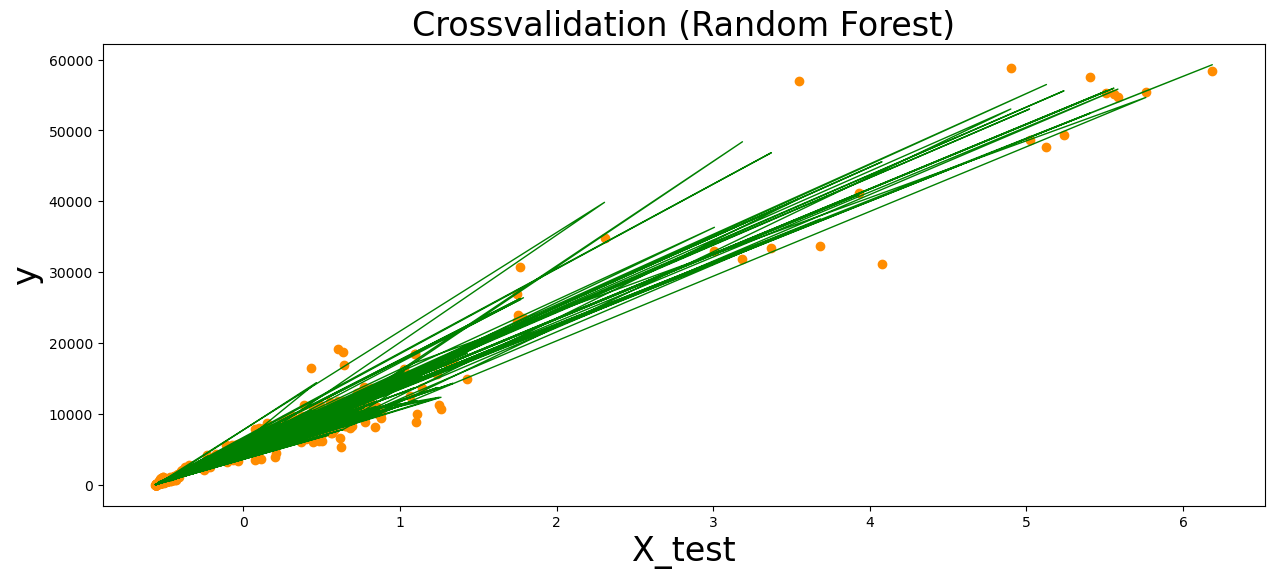

In [24]:
import matplotlib.pyplot as plt
# print(X_test)
# print(y_test)
# plt.plot(X_test,forecast_set,color='blue', linewidth=1)
plt.scatter(X_test, y_test, color='darkorange', label='data')
plt.plot(X_test, cross_validation, color='green', linewidth=1,label='predicted')
plt.title("Crossvalidation (Random Forest)",fontsize=24)
plt.xlabel('X_test',fontsize=24)
plt.ylabel('y',fontsize=24)
# plt.plot(X_test, forecast_prediction, color='blue', linew/idth=2)
plt.show()

# RMSE

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = (sqrt(mean_squared_error(y_test, cross_validation)))/10000
print(rms)

0.17800206599900084


In [26]:
last_date = new_df.iloc[-1].name
print(last_date)

2021-03-31


In [27]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

date_today = last_date
days = pd.date_range(date_today, date_today + timedelta(19), freq='D')
print(len(days),len(forecast_prediction))
# np.random.seed(seed=1111)
# data = np.random.randint(1, high=100, size=len(days))
df1 = pd.DataFrame({'Date': days, 'Close': forecast_prediction})
df1 =df1.set_index('Date')
df1.info()
print(df.head())

20 20
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2021-03-31 to 2021-04-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes
               Close  Prediction
Date                            
2011-12-31  4.471603    6.835000
2012-01-01  4.806667    6.386000
2012-01-02  5.000000    6.485000
2012-01-03  5.252500    6.407500
2012-01-04  5.208159    6.495556


Text(0, 0.5, '$(Dollar)')

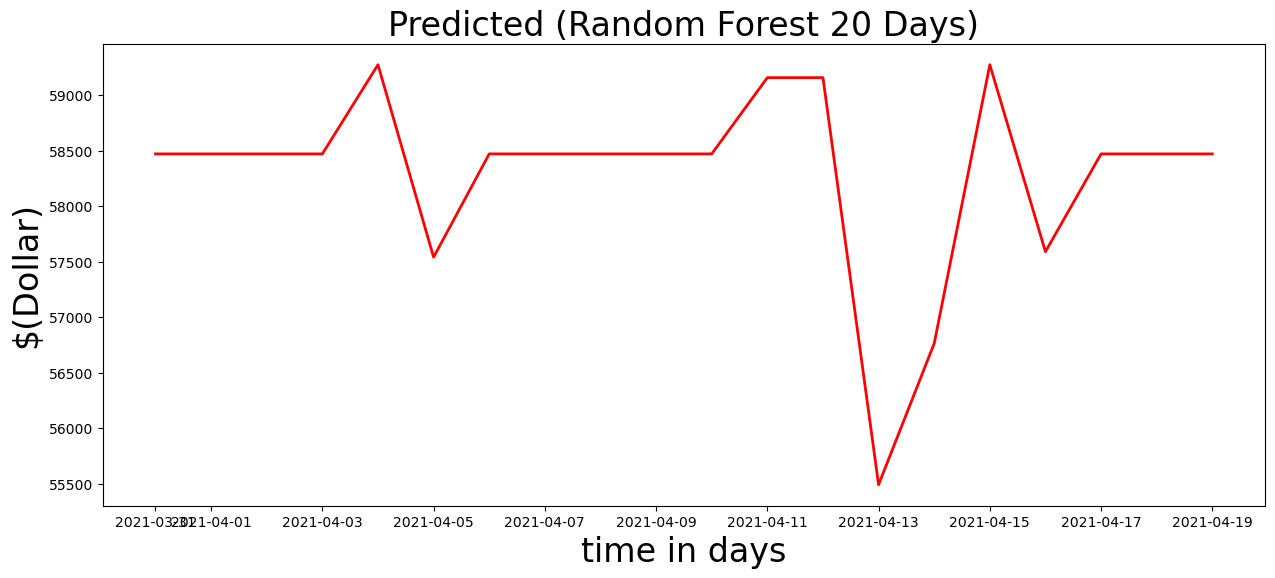

In [28]:
plt.plot(df1,color='red', lw=2)
plt.title("Predicted (Random Forest 20 Days)",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)

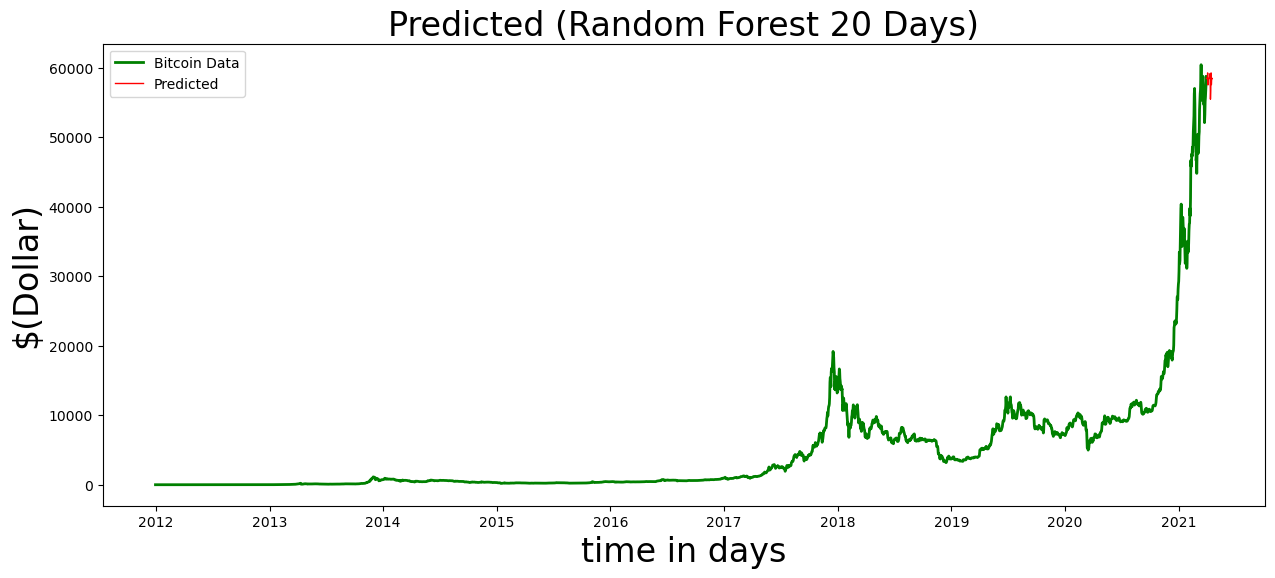

In [29]:
plt.plot(df['Close'],label='Bitcoin Data',color='green', lw=2)
plt.plot(df1['Close'],label='Predicted',color='red', lw=1)
plt.title("Predicted (Random Forest 20 Days)",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)
plt.legend(loc='best')

<font size="11">XG BOOST</font>

In [30]:
df2 = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df2.Timestamp = pd.to_datetime(df2.Timestamp, unit='s')
df2.index = df2.Timestamp
df2 = df2.resample('D').mean()
df2 = df2.dropna()
# changes data to strictly to the previous 4 years, which is March 2017 to March 2021
df2 = df2.iloc[(-365*4):]
print(df2.shape)

(1460, 7)


In [31]:
df5 = df2.copy()
X = df5
size = int(len(X) * 0.7)
data_train, data_test = X[0:size], X[size:len(X)]

In [32]:
def create_features(df, label=None):
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [33]:
X_train, y_train = create_features(data_train, label='Weighted_Price')
X_test, y_test = create_features(data_test, label='Weighted_Price')

C:\Users\dpran\AppData\Local\Temp\ipykernel_25604\2648855820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df.index
C:\Users\dpran\AppData\Local\Temp\ipykernel_25604\2648855820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['date'].dt.hour
C:\Users\dpran\AppData\Local\Temp\ipykernel_25604\2648855820.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [34]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
model =  xgb.XGBRegressor(objective ='reg:linear',min_child_weight=10, booster='gbtree', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=50, verbose=False)

[23:50:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\dpran\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(alpha=10, base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', ...)

In [35]:
data_test['Weighted_Price_Prediction'] = model.predict(X_test)
data_all = pd.concat([data_test, data_train], sort=False)

C:\Users\dpran\AppData\Local\Temp\ipykernel_25604\2827658289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Weighted_Price_Prediction'] = model.predict(X_test)


<AxesSubplot:xlabel='Timestamp'>

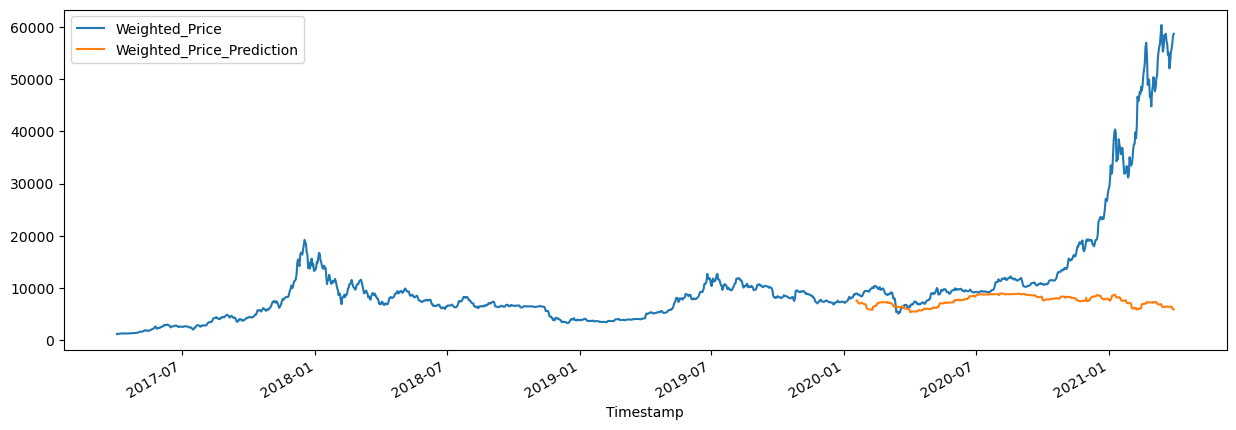

In [36]:
data_all[['Weighted_Price','Weighted_Price_Prediction']].plot(figsize=(15, 5))

In [37]:
data_test.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Weighted_Price_Prediction
Timestamp,,,,,,,,,,,,,,,,,
2020-01-18,8891.207561,8895.987338,8886.848700,8890.932203,2.555948,22739.596158,8891.817032,2020-01-18,0,5,1,1,2020,18,18,3,7527.448730
2020-01-19,8846.440862,8852.059917,8841.301460,8846.728456,6.109492,53655.111012,8847.166822,2020-01-19,0,6,1,1,2020,19,19,3,7478.336914
2020-01-20,8644.165698,8648.276386,8640.256435,8644.101508,3.071715,26529.821802,8644.708000,2020-01-20,0,0,1,1,2020,20,20,4,7153.494141
2020-01-21,8645.480195,8649.571579,8642.046356,8645.604819,2.360702,20386.559122,8646.193567,2020-01-21,0,1,1,1,2020,21,21,4,6988.816406
2020-01-22,8665.194124,8668.595431,8662.189026,8665.453755,2.186239,18933.853843,8665.685486,2020-01-22,0,2,1,1,2020,22,22,4,6976.790039


# RMSE

In [38]:
rmse = (np.sqrt(mean_squared_error(data_test['Weighted_Price'], data_test['Weighted_Price_Prediction'])))/100000
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.185


# Confidence,MAE,R2

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model.predict(X_test)
conf3=-1*model.score(X_test,y_test)
predictions = [round(value) for value in y_pred]
print("Confidence:",conf3)
mae3 = (mean_absolute_error(y_test, y_pred))/1000
print("Mae:",mae3)
r23 = -1*r2_score(y_test, y_pred)
print("r2:",r23)


Confidence: 0.55316364870884
Mae: 10.775987510519075
r2: 0.55316364870884


In [40]:
print(predictions)

[7527, 7478, 7153, 6989, 6977, 6975, 7037, 7085, 7084, 6939, 6862, 6873, 6767, 6745, 6069, 5982, 5885, 5842, 5774, 5791, 5789, 5834, 5743, 6339, 6377, 6463, 6491, 6485, 6836, 6878, 7113, 7070, 7152, 7168, 7165, 7201, 7182, 7229, 7163, 7219, 7188, 7185, 7256, 7053, 7099, 7057, 7127, 7030, 6983, 6864, 6748, 6511, 6318, 6480, 6448, 6369, 6297, 6278, 6332, 6268, 6260, 6277, 6322, 6358, 6339, 6040, 5990, 5977, 5978, 5975, 5932, 5924, 5888, 5815, 5284, 5339, 5399, 5444, 5425, 5404, 5416, 5405, 5394, 5382, 5509, 5558, 5701, 5639, 5631, 5619, 5640, 5685, 5721, 5996, 5922, 5910, 5904, 5894, 5953, 5966, 5905, 5917, 5928, 5881, 6082, 6057, 6198, 6086, 6150, 6139, 6133, 6131, 6293, 6283, 6647, 6982, 6987, 6981, 6974, 7013, 6985, 6996, 7157, 7085, 7079, 7077, 7122, 7110, 7109, 7149, 7150, 7144, 7152, 7197, 7182, 7551, 7507, 7624, 7643, 7612, 7660, 7743, 7566, 7623, 7569, 7627, 7594, 7642, 7637, 7798, 7805, 7786, 7780, 7824, 8033, 8028, 8344, 8356, 8347, 8354, 8379, 8427, 8422, 8262, 8274, 8513, 859

In [41]:
last_date = new_df.iloc[-21].name
print(last_date)

2021-03-11


In [42]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

date_today = last_date
days = pd.date_range(date_today, date_today + timedelta(19), freq='D')
print(len(days),len(forecast_prediction))
# np.random.seed(seed=1111)
# data = np.random.randint(1, high=100, size=len(days))
df5 = pd.DataFrame({'Date': days, 'Close': forecast_prediction})
df5 =df5.set_index('Date')
df5.info()
print(df5.head())

20 20
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2021-03-11 to 2021-03-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes
                   Close
Date                    
2021-03-11  58472.437810
2021-03-12  58472.437810
2021-03-13  58472.437810
2021-03-14  58472.437810
2021-03-15  59275.964015


In [43]:
last_date = df2.iloc[-1].name
print(last_date)

2021-03-31 00:00:00


In [44]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

date_today = last_date
days = pd.date_range(date_today, date_today + timedelta(19), freq='D')
print(len(days),len(forecast_prediction))
# np.random.seed(seed=1111)
# data = np.random.randint(1, high=100, size=len(days))
df5 = pd.DataFrame({'Date': days, 'Close': forecast_prediction})
df5 =df5.set_index('Date')
df5.info()
print(df5.head())

20 20
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2021-03-31 to 2021-04-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes
                   Close
Date                    
2021-03-31  58472.437810
2021-04-01  58472.437810
2021-04-02  58472.437810
2021-04-03  58472.437810
2021-04-04  59275.964015


Text(0, 0.5, '$(Dollar)')

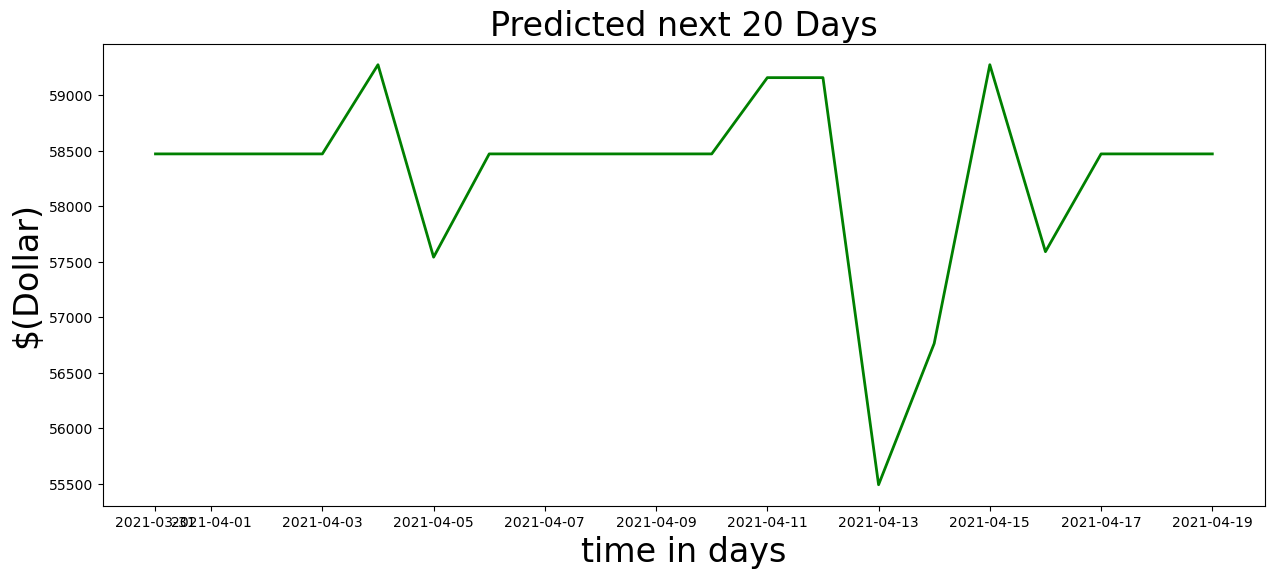

In [45]:
plt.plot(df5,color='green', lw=2)
plt.title("Predicted next 20 Days",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)

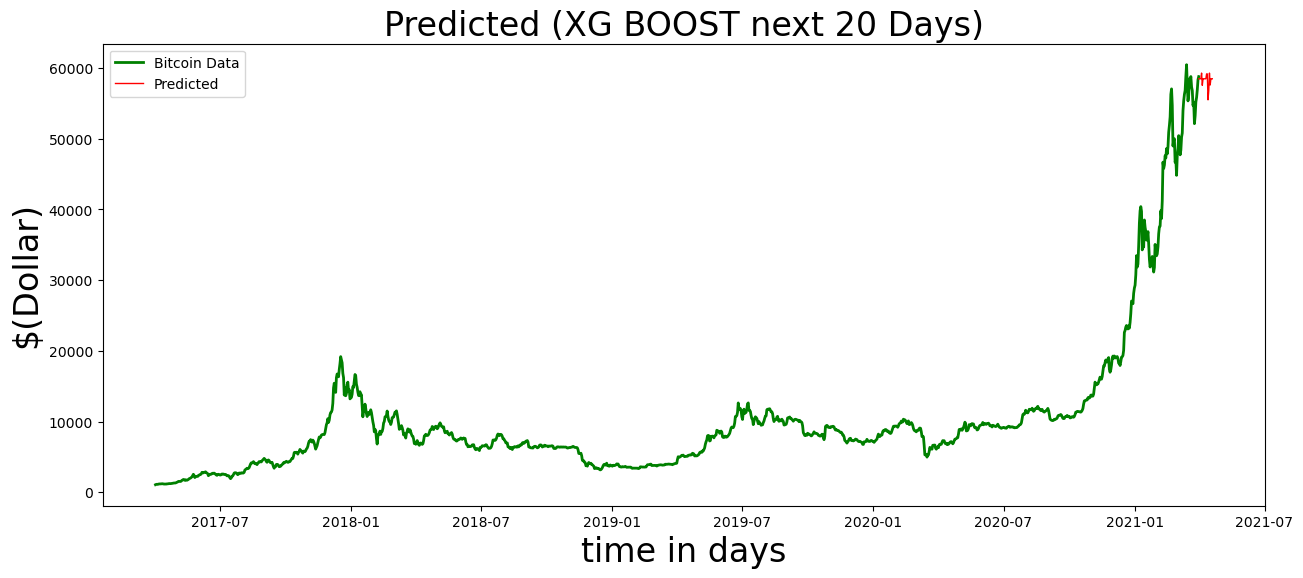

In [46]:
plt.plot(df2['Close'],label='Bitcoin Data',color='green', lw=2)
plt.plot(df5['Close'],label='Predicted',color='red', lw=1)
plt.title("Predicted (XG BOOST next 20 Days)",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)
plt.legend(loc='best')

# Comparing Performance Metrics

# RMSE Value

# Linear Regression Model

In [47]:
rms1

0.16562467724223842

# Random Forest Regressor

In [48]:
rms


0.17800206599900084

# XG Boost

In [49]:
rmse


0.1846314872473848

# Confidence

# Linerar Regression Model

In [50]:
confidence

0.9623371267846078

# Random Forest Regressor

In [51]:
confidence2


0.9564975772575193

# XG Boost

In [52]:
conf3

0.55316364870884

# Mean Absoulute Error

# Linear Regression

In [53]:
mae

8.40637723889551

# Random Forest Regressor

In [54]:
mae2

3.6503635452612655

# XG Boost

In [55]:
mae3

10.775987510519075

# R2

# Linear Regression

In [56]:
r2

0.9508882426387346

# Random Forest Regressor

In [57]:
r22

0.9846076514045736

# XG Boost

In [58]:
r23

0.55316364870884

# Evaluation Graphs

# RMSE

findfont: Font family ['Bookman Old Style'] not found. Falling back to DejaVu Sans.


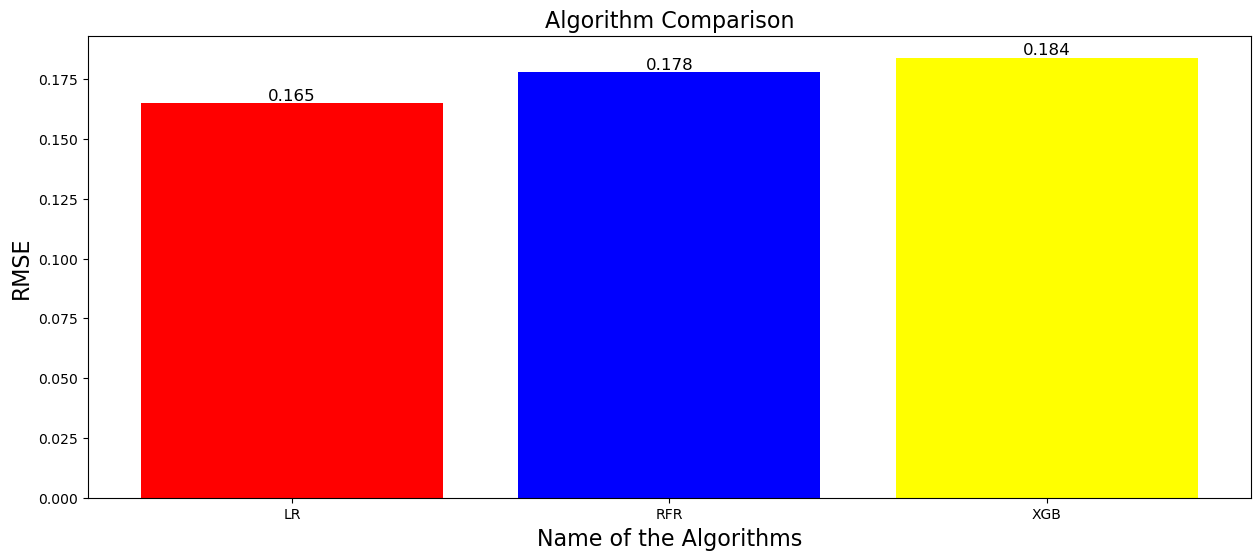

In [60]:
x=np.array(["LR","RFR","XGB"])
y=np.array([0.165,0.178,0.184])
color_list=['Red','Blue','Yellow']
plt.xlabel('Name of the Algorithms',fontname="Bookman Old Style",fontsize=16)
plt.title('Algorithm Comparison',fontname="Bookman Old Style",fontsize=16)
plt.ylabel('RMSE',fontname="Bookman Old Style",fontsize=16)
pb=plt.bar(x,y,color=color_list)
for i in range(len(x)):
    plt.text(i,y[i],y[i],ha="center",va="bottom",fontname="Bookman Old Style",fontsize=12)
plt.show()

# Confidence

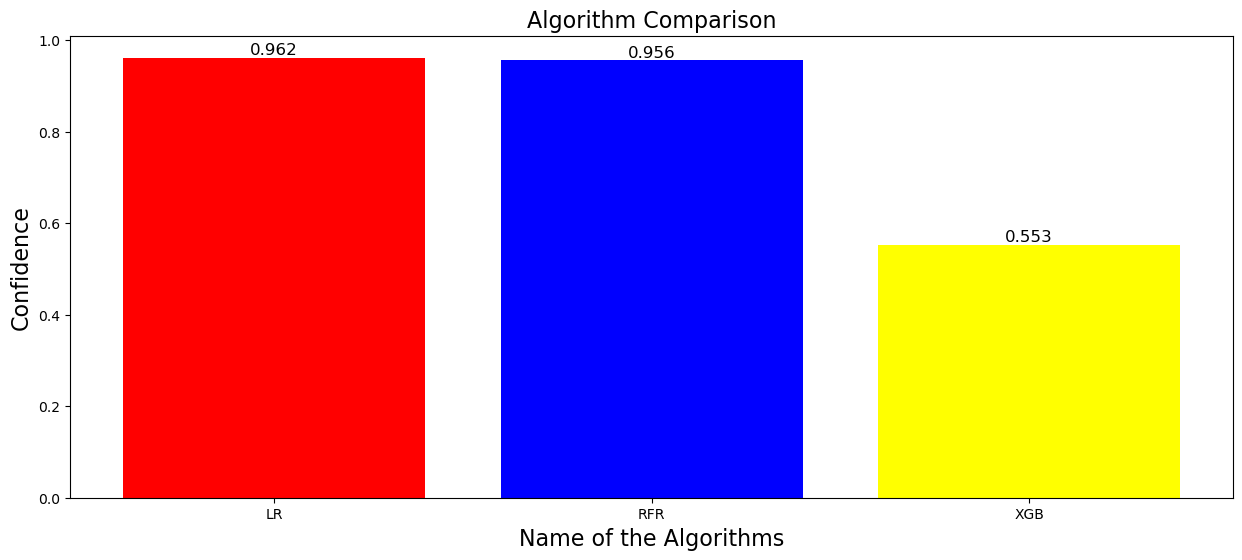

In [61]:
x=np.array(["LR","RFR","XGB"])
y=np.array([0.962,0.956,0.553])
color_list=['Red','Blue','Yellow']
plt.xlabel('Name of the Algorithms',fontname="Bookman Old Style",fontsize=16)
plt.title('Algorithm Comparison',fontname="Bookman Old Style",fontsize=16)
plt.ylabel('Confidence',fontname="Bookman Old Style",fontsize=16)
pb=plt.bar(x,y,color=color_list)
for i in range(len(x)):
    plt.text(i,y[i],y[i],ha="center",va="bottom",fontname="Bookman Old Style",fontsize=12)
plt.show()

# MAE

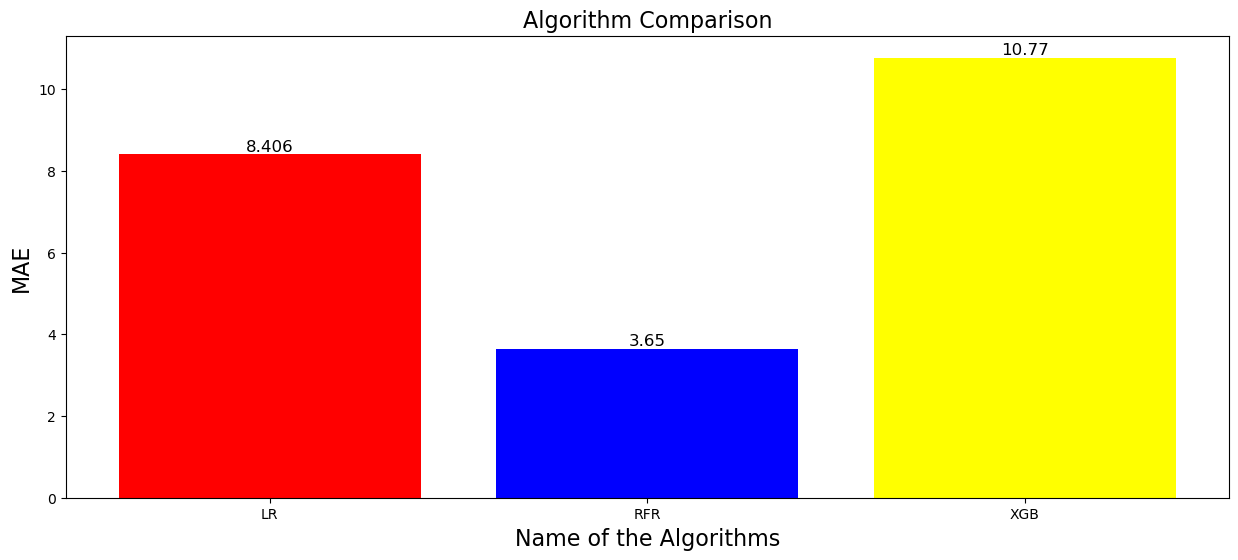

In [62]:
x=np.array(["LR","RFR","XGB"])
y=np.array([8.406,3.65,10.77])
color_list=['Red','Blue','Yellow']
plt.xlabel('Name of the Algorithms',fontname="Bookman Old Style",fontsize=16)
plt.title('Algorithm Comparison',fontname="Bookman Old Style",fontsize=16)
plt.ylabel('MAE',fontname="Bookman Old Style",fontsize=16)
pb=plt.bar(x,y,color=color_list)
for i in range(len(x)):
    plt.text(i,y[i],y[i],ha="center",va="bottom",fontname="Bookman Old Style",fontsize=12)
plt.show()

# R2

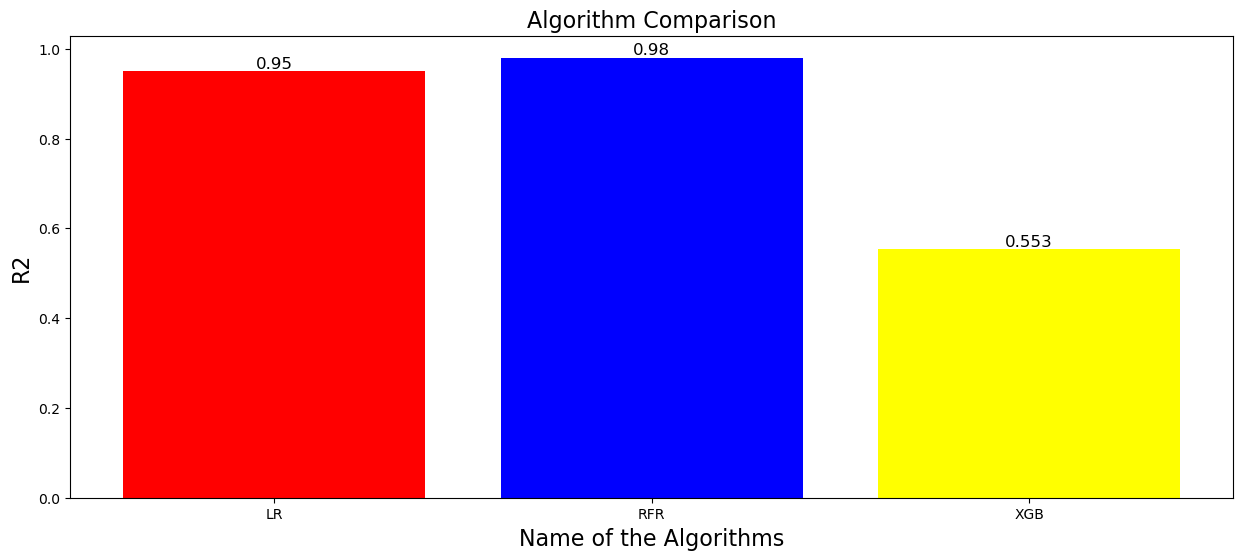

In [63]:
x=np.array(["LR","RFR","XGB"])
y=np.array([0.95,0.98,0.553])
color_list=['Red','Blue','Yellow']
plt.xlabel('Name of the Algorithms',fontname="Bookman Old Style",fontsize=16)
plt.title('Algorithm Comparison',fontname="Bookman Old Style",fontsize=16)
plt.ylabel('R2',fontname="Bookman Old Style",fontsize=16)
pb=plt.bar(x,y,color=color_list)
for i in range(len(x)):
    plt.text(i,y[i],y[i],ha="center",va="bottom",fontname="Bookman Old Style",fontsize=12)
plt.show()